# <font color="green">Lab 3</font>
***
`LabelEncoder` and `OneHotEncoder` are used to label the data which are strings into numerical values.
## <font color="cyan">Imports</font>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer
data = pd.read_csv('Data.csv')
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


##   Imputer, LabelEncoder, and OneHotEncoder
> Below is for taking x and y values

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values

In [4]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3]) 

X[:, 1:3] = imputer.transform(X[:, 1:3])

C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\KIRAN\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
print(X_test)

[[-1.          2.64575131 -0.77459667 -1.45882927 -0.90166297]
 [-1.          2.64575131 -0.77459667  1.98496442  2.13981082]]


## Salary Predictions

In [9]:
import seaborn as sns

sns.regplot(salary_data['YearsExperience'], salary_data['Salary'])

NameError: name 'salary_data' is not defined

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

ValueError: could not convert string to float: 'Spain'

In [ ]:
print(regressor.predict([[8]]))

## Startups

In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 6]

data = pd.read_csv('50_Startups.csv')

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


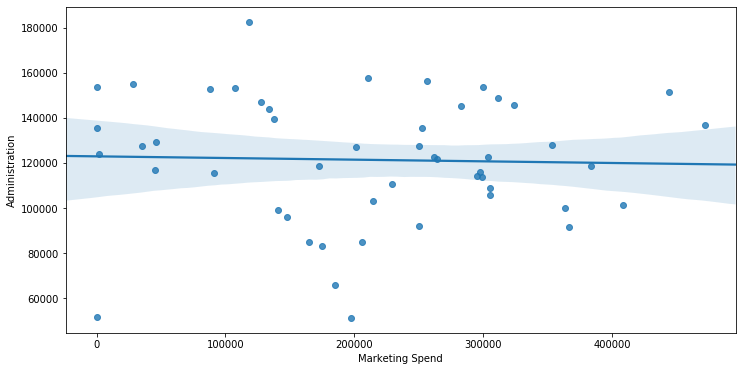

In [24]:
sns.regplot(data['Marketing Spend'],data['Administration'],data['Profit'])

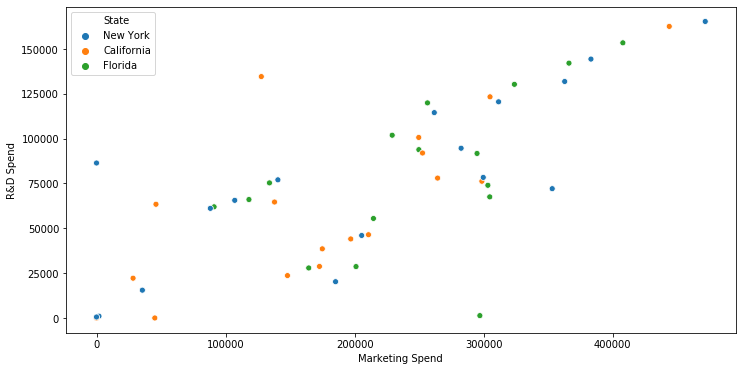

In [15]:
sns.scatterplot(x='Marketing Spend', y='R&D Spend', hue='State', data=data)

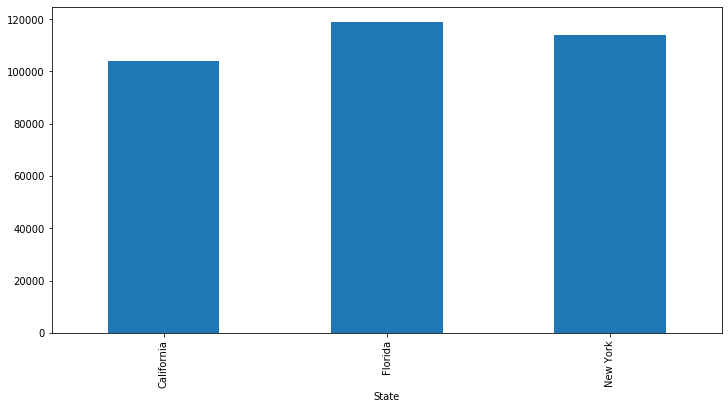

In [25]:
data['Profit'].groupby(data['State']).mean().plot.bar()

In [26]:
from sklearn.model_selection import train_test_split

X = data['Marketing Spend'].values
y = data['Profit'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [28]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [29]:
df['Diff'] = df.apply(lambda row: (row['Actual'] - row['Predicted']), axis=1)

In [30]:
df.head()

,Actual,Predicted,Diff
0,103282.38,88778.925844,14503.454156
1,144259.40,121159.909380,23099.490620
2,146121.95,116095.048442,30026.901558
3,77798.83,100177.178407,-22378.348407
4,191050.39,160084.601910,30965.788090


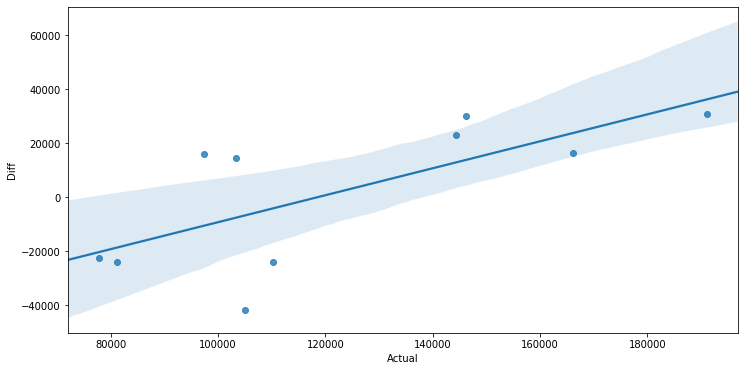

In [32]:
sns.regplot(df['Actual'], df['Diff'])